In [1]:
# reference by
# https://github.com/mahdibidar/CoronaVirusDailyNewCasesForecasting/blob/master/CoronaVirusDailyNewCasesForecasting.ipynb

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import keras
from sklearn import linear_model
import torch 
import os
import numpy as np
import pandas as pd
import tqdm as tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib as rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from pandas.plotting import lag_plot
from pandas import datetime
from sklearn.metrics import mean_squared_error

<ipython-input-1-91d110bb841d>:24: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [6]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,853,853,854,854,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,140,142,148,155,166,172,176,183,186,189


In [13]:
df1 = df.groupby(['Country/Region']).sum()

In [14]:
df1.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,853,853,854,854,855,855,855,855,855,855
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,140,142,148,155,166,172,176,183,186,189


In [16]:
index = df1.index
print("The shape of df is", df.shape)
print("The shape of the df1 is", df1.shape)

The shape of df is (266, 158)
The shape of the df1 is (188, 156)


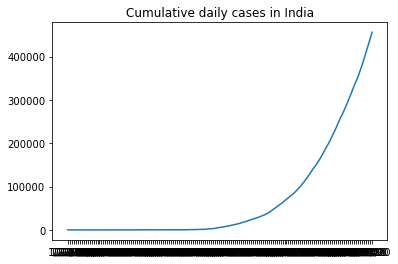

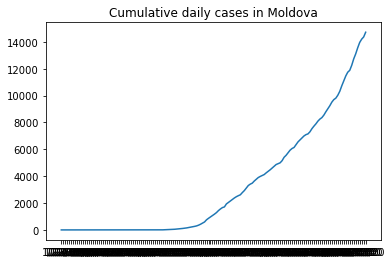

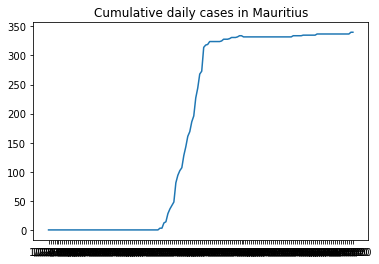

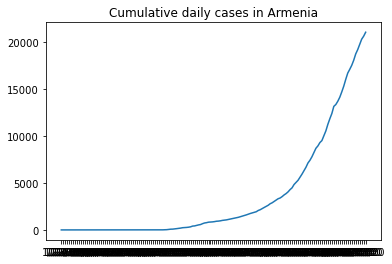

In [17]:
DF = {}
RND = {}

values = np.random.randint(4, 188, 4)

for i, rnd in enumerate(values):
    DF[i] = df1.iloc[rnd, 2:]
    RND[i] = index[rnd]
    
for i in range(len(DF)):
    plt.plot(DF[i], label=RND[i])
    plt.title('Cumulative daily cases in ' + RND[i])
    plt.show()

In [18]:
df1 = df1.iloc[:, 2:]
df1.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481
Albania,0,0,0,0,0,0,0,0,0,0,...,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047
Algeria,0,0,0,0,0,0,0,0,0,0,...,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076
Andorra,0,0,0,0,0,0,0,0,0,0,...,853,853,854,854,855,855,855,855,855,855
Angola,0,0,0,0,0,0,0,0,0,0,...,140,142,148,155,166,172,176,183,186,189


In [19]:
df1.isnull().sum().any()

False

In [20]:
daily_confirmed_cases = df1.sum(axis=0)
daily_confirmed_cases.head()

1/22/20     555
1/23/20     654
1/24/20     941
1/25/20    1434
1/26/20    2118
dtype: int64

In [21]:
daily_confirmed_cases.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/14/20', '6/15/20', '6/16/20', '6/17/20', '6/18/20', '6/19/20',
       '6/20/20', '6/21/20', '6/22/20', '6/23/20'],
      dtype='object', length=154)

In [22]:
daily_confirmed_cases.index = pd.to_datetime(daily_confirmed_cases.index)

In [23]:
daily_confirmed_cases.head()

2020-01-22     555
2020-01-23     654
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
dtype: int64

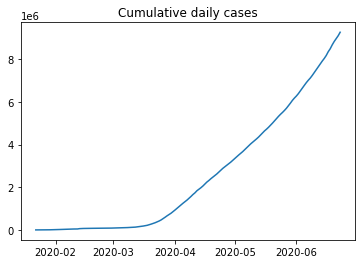

In [24]:
plt.plot(daily_confirmed_cases)
plt.title("Cumulative daily cases");

In [25]:
new_cases = daily_confirmed_cases.diff().dropna().astype(np.int64)
new_cases

2020-01-23        99
2020-01-24       287
2020-01-25       493
2020-01-26       684
2020-01-27       809
               ...  
2020-06-19    181347
2020-06-20    158863
2020-06-21    131421
2020-06-22    138036
2020-06-23    164823
Length: 153, dtype: int64

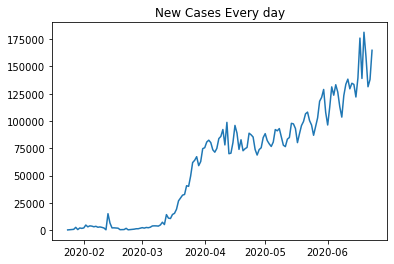

In [26]:
plt.plot(new_cases[1:])
plt.title("New Cases Every day");

In [27]:
def train_test_split(new_cases, pct):
    In_n = int(np.ceil(pct*len(new_cases)))
    X_train = new_cases[:In_n+1]
    X_test = new_cases[In_n:]
    return X_train, X_test

pct = 0.75
train_data, test_data = train_test_split(new_cases, pct)

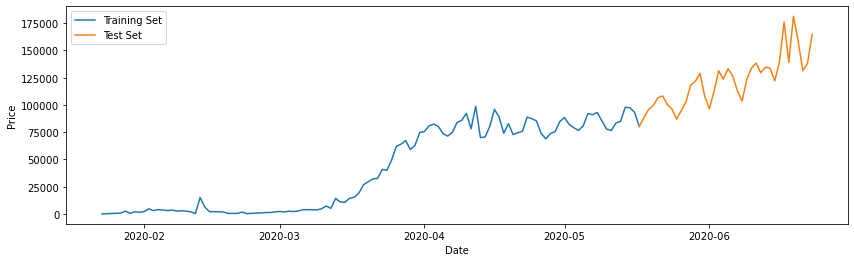

In [28]:
plt.figure(figsize=(14,4))
plt.plot(train_data)
plt.plot(test_data)
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(["Training Set", "Test Set"])

In [29]:
scaler = MinMaxScaler()
scaler = scaler.fit((np.array(train_data)).reshape(-1,1))
train_data = scaler.transform((np.array(train_data)).reshape(-1,1))
test_data = scaler.transform((np.array(test_data)).reshape(-1,1))

In [30]:
X_train = []
y_train = []

lengthTr = len(train_data)
timeStamp = 10

for i in range(timeStamp, lengthTr):
    X_train.append(train_data[i-timeStamp:i])
    y_train.append(train_data[i])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = []
y_test = []

lengthTe = len(test_data)

for i in range(timeStamp, lengthTe):
    X_test.append(test_data[i-timeStamp:i])
    y_test.append(test_data[i])
    
X_test = np.array(X_test)
y_test = np.array(y_test)

In [31]:
model = Sequential([
                    keras.layers.LSTM(units=30, return_sequences=True, input_shape=(X_train.shape[1],1)),
                    Dropout(0.4),

                    keras.layers.LSTM(units=20, return_sequences=True),
                    Dropout(0.4),

                    keras.layers.LSTM(units=20, return_sequences=True),
                    Dropout(0.4),

                    keras.layers.LSTM(units=20),
                    Dropout(0.4),

                    keras.layers.Dense(units=1),
                   ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 30)            3840      
_________________________________________________________________
dropout (Dropout)            (None, 10, 30)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 20)            4080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 20)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 20)            3280      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 20)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                3

In [32]:
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_squared_error'])

In [33]:
model.fit(X_train, y_train, epochs=50, batch_size=200)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.3232 - mean_squared_error: 0.3232
Epoch 2/50
1/1 [==============================] - 0s 16ms/step - loss: 0.2736 - mean_squared_error: 0.2736
Epoch 3/50
1/1 [==============================] - 0s 16ms/step - loss: 0.2268 - mean_squared_error: 0.2268
Epoch 4/50
1/1 [==============================] - 0s 16ms/step - loss: 0.1664 - mean_squared_error: 0.1664
Epoch 5/50
1/1 [==============================] - 0s 17ms/step - loss: 0.1367 - mean_squared_error: 0.1367
Epoch 6/50
1/1 [==============================] - 0s 18ms/step - loss: 0.1064 - mean_squared_error: 0.1064
Epoch 7/50
1/1 [==============================] - 0s 18ms/step - loss: 0.0577 - mean_squared_error: 0.0577
Epoch 8/50
1/1 [==============================] - 0s 17ms/step - loss: 0.0646 - mean_squared_error: 0.0646
Epoch 9/50
1/1 [==============================] - 0s 17ms/step - loss: 0.0670 - mean_squared_error: 0.0670
Epoch 10/50
1/1 [======================

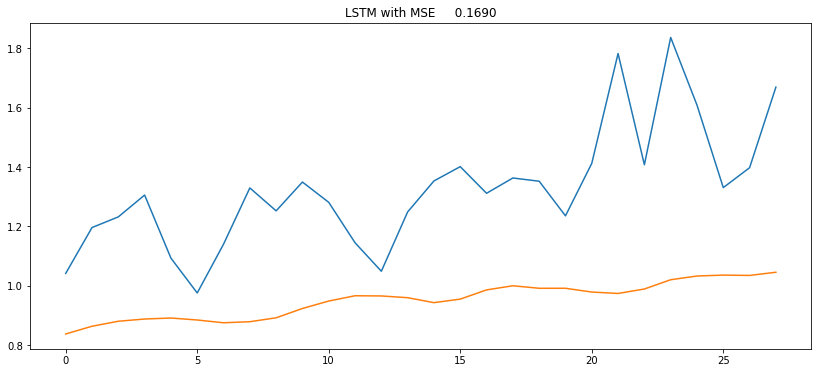

In [34]:
pred_result = {}

y_true = (y_test)
y_pred = (model.predict(X_test))
MSE = mean_squared_error(y_true, y_pred)
pred_result= {}
pred_result["True"] = y_true
pred_result["Pred"] = y_pred

plt.figure(figsize=(14,6))
plt.title("LSTM with MSE {:10.4f}".format(MSE))
plt.plot(y_true)
plt.plot(y_pred)

In [35]:
model_GRU= Sequential([
                keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'),
                Dropout(0.2),

                keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'),
                Dropout(0.2),

                keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'),
                Dropout(0.2),

                keras.layers.GRU(units=50, activation='tanh'),
                Dropout(0.2),

                keras.layers.Dense(units=1)])



model_GRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

model_GRU.fit(X_train, y_train,epochs=50,batch_size=150)

C:\Users\alstj\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.3678
Epoch 2/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3101
Epoch 3/50
1/1 [==============================] - 0s 21ms/step - loss: 0.2409
Epoch 4/50
1/1 [==============================] - 0s 22ms/step - loss: 0.1637
Epoch 5/50
1/1 [==============================] - 0s 24ms/step - loss: 0.1338
Epoch 6/50
1/1 [==============================] - 0s 26ms/step - loss: 0.1513
Epoch 7/50
1/1 [==============================] - 0s 23ms/step - loss: 0.1775
Epoch 8/50
1/1 [==============================] - 0s 23ms/step - loss: 0.2056
Epoch 9/50
1/1 [==============================] - 0s 24ms/step - loss: 0.2076
Epoch 10/50
1/1 [==============================] - 0s 23ms/step - loss: 0.1967
Epoch 11/50
1/1 [==============================] - 0s 21ms/step - loss: 0.1499
Epoch 12/50
1/1 [==============================] - 0s 20ms/step - loss: 0.1172
Epoch 13/50
1/1 [==============================] - 0s 19ms/step

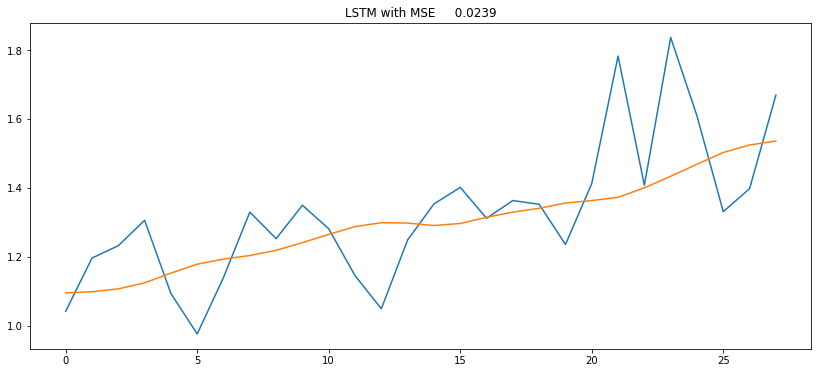

In [36]:
pred_result = {}

y_true = (y_test.reshape(-1,1))
y_pred = (model_GRU.predict(X_test))
MSE = mean_squared_error(y_true, y_pred)
pred_result= {}
pred_result["True"] = y_true
pred_result["Pred"] = y_pred

plt.figure(figsize=(14,6))
plt.title("LSTM with MSE {:10.4f}".format(MSE))
plt.plot(y_true)
plt.plot(y_pred)